In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data_venue.head()

,type,article_id,_id,name_d,raw,raw_zh,publisher,sid,issn,t,online_issn,name_s,name,src
0,0.0,53e99784b7602d9701f3e3f5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,53e99784b7602d9701f3e133,53a7297d20f7420be8bd4ae7,International Geoscience and Remote Sensing Sy...,IGARSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,53e99784b7602d9701f3e151,53a72a4920f7420be8bfa51b,International Conference on Document Analysis ...,ICDAR-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,53e99784b7602d9701f3e15d,53a72e2020f7420be8c80142,International Symposium on Circuits and Systems,ISCAS (3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,53e99784b7602d9701f3e161,5390a74a20f70186a0e8b40b,NaN,ACM SIGGRAPH ASIA 2009 Art Gallery & Emerging ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
statistics_by_column = {
    'column': [],
    "% null": [],
    "count": []
}

for cur_columns in data_venue.columns:
    statistics_by_column["% null"].append(data_venue[cur_columns].isna().sum()/len(data_venue)*100)
    statistics_by_column["count"].append(len(data_venue))
    statistics_by_column["column"].append(cur_columns)

dataframe_stat = pd.DataFrame(data = statistics_by_column)
dataframe_stat.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column,type,article_id,_id,name_d,raw,raw_zh,publisher,sid,issn,t,online_issn,name_s,name,src
% null,33.115085,0.0,38.686662,67.519408,2.014312,99.98044,94.9418,71.210431,83.632613,72.766436,91.668057,98.944618,98.212158,99.24237
count,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732,5347732


Поля 


raw_zh
publisher
online_issn
name_s
name
src

содержат более 90% пропусков


In [8]:
data_venue['t'].value_counts()

J    1115070
C     341308
Name: t, dtype: int64

Рассмотрим оставшиеся поля

type - [ 0., nan, 10., 11., 12.,  2.,  1.,  3.,  7.,  8.,  6.,  5.,  4.] - тип издания

article_id - id статьи

id - id издания

name_d - название журнала

raw - полное название журнала

sid - полное название журнала или (номер ?)

issn - международный стандартный сериальный номер

t - не ясное поле ['J', 'C', nan]

name_d, sid, t - по своему смыслу не дадут там никакой информации для рекомендательных систем, т.к. по сути дают идентификацию для журнала и уникальны



In [26]:
cnt_types=data_venue[[ '_id', 'type']].groupby('_id', as_index=False).nunique()
cnt_types[cnt_types.type>1].sort_values(by='type', ascending=False)

,_id,type
6475,53908c1120f70186a0dcbe84,6
23533,53a72ca420f7420be8c4aef0,6
9916,53909ed520f70186a0e31cc4,6
18411,53a726af20f7420be8b7e091,5
5087,5390802620f770854f619dd8,5
...,...,...
22224,53a72afa20f7420be8c1439f,2
22209,53a72af620f7420be8c137d3,2
22205,53a72af520f7420be8c137cb,2
22171,53a72aec20f7420be8c12021,2


In [31]:
print("Изданий больше чем с 1 типом: %d%%" %(len(cnt_types[cnt_types.type>1])/len(cnt_types)*100))
print("Изданий без типа %d%%" %(len(cnt_types[cnt_types.type==0])/len(cnt_types)*100))

Изданий больше чем с 1 типом: 5%
Изданий без типа 11%


In [22]:
data_venue[data_venue['_id']=='53908c1120f70186a0dcbe84'][:10]

,type,article_id,_id,name_d,raw,raw_zh,publisher,sid,issn,t,online_issn,name_s,name,src
33804,12.0,53e99800b7602d9702010603,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33897,1.0,53e99800b7602d970201092a,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62371,12.0,53e99854b7602d970208c12e,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555891,1.0,53e99fd0b7602d97028ae2b0,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913416,1.0,53e9a5dab7602d9702f01eba,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934961,12.0,53e9a635b7602d9702f635bb,53908c1120f70186a0dcbe84,Information Visualization,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996012,1.0,53e9a749b7602d970307f493,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119553,0.0,53e9a957b7602d97032ac191,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119605,1.0,53e9a957b7602d97032ac2a4,53908c1120f70186a0dcbe84,NaN,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635511,12.0,53e9b13eb7602d9703bc0344,53908c1120f70186a0dcbe84,Information Visualization,Information Visualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


type - тип издания. 
К сожалению, не получилось найти словарь перевода кодового представления в осмысленные значения.
значение type не определено для более 11% изданий с _ID
для 5% тип издания меняется от статьи к статье

Из-за этого поле получается неинформативным и будет удалено

поля:
raw 
article_id
id


дадут возможность полностью идетифицировать издание в базе и могут стать признаками в моделе рекомендации статей

In [60]:
data_venue=data_venue[['article_id', '_id', 'raw']]

В отличии от имени у названий журналов не должно быть коллизий

In [52]:
#журналы с именем, но без id
len(data_venue[data_venue['_id'].isnull() & (-data_venue['raw'].isnull())])

1961419

Но оказалось, что в журналах под одним и тем же _id могут быть записаны несколько разных журналов

In [61]:
with_id=data_venue[-data_venue['_id'].isnull()][['_id', 'raw']].drop_duplicates()
with_id_group=with_id.groupby('_id', as_index=False).nunique().sort_values(by='raw', ascending=False)
with_id_group.head(10)

,_id,raw
25591,53a7300320f7420be8cd3e55,1573
33462,555036d37cea80f95415b0ba,639
26965,53e17f7520f7dfbc07e8ad07,177
23322,53a72c5920f7420be8c42ca7,45
24106,53a72d6120f7420be8c6352f,44
9916,53909ed520f70186a0e31cc4,44
20691,53a7296520f7420be8bd32ce,41
22788,53a72b9f20f7420be8c2b252,39
21518,53a72a4520f7420be8bf8d9b,38
20499,53a7293020f7420be8bca4fd,37


In [56]:
with_id[with_id['_id']=='53a7300320f7420be8cd3e55']

,_id,raw
5161,53a7300320f7420be8cd3e55,UAI '00 Proceedings of the 16th Conference on ...
5746,53a7300320f7420be8cd3e55,Evolutionary Computations
5975,53a7300320f7420be8cd3e55,UAI'95 Proceedings of the Eleventh conference ...
6124,53a7300320f7420be8cd3e55,UAI'98 Proceedings of the Fourteenth conferenc...
7717,53a7300320f7420be8cd3e55,UAI'99 Proceedings of the Fifteenth conference...
...,...,...
4569684,53a7300320f7420be8cd3e55,Journal of Combinatorial Optimization
4573089,53a7300320f7420be8cd3e55,SIAM Journal on Computing
4589513,53a7300320f7420be8cd3e55,Journal of Mathematical Sciences
4590683,53a7300320f7420be8cd3e55,Foundations of Computational Mathematics


6.5% имеют разные имена на один id

In [63]:
len(with_id_group[with_id_group['raw']>1])/len(with_id_group)

0.06557058709301573

# число различных журналов

In [34]:
data_venue['_id'].nunique()

46347

самые публикуемые издания

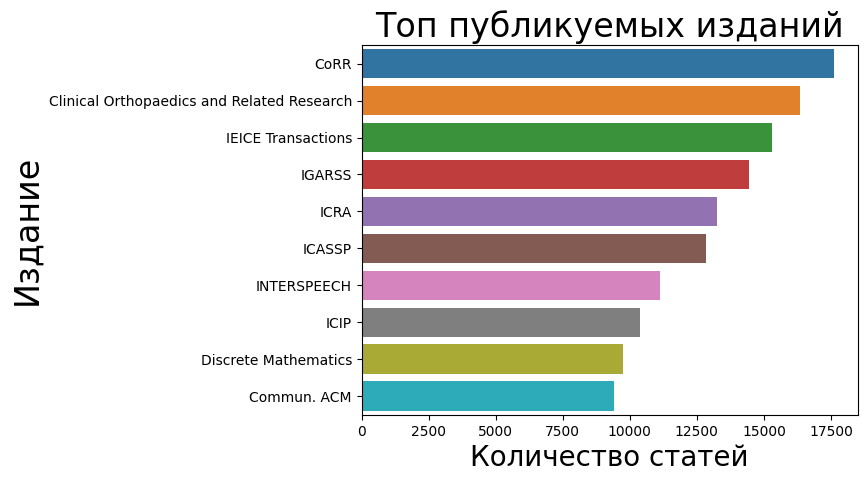

In [46]:
cnt_venue=data_venue.groupby(['_id', 'raw'], as_index=False).nunique().sort_values(by='article_id', ascending=False)[:10]

x=[]
y=[]

for cur_ind in cnt_venue['raw']:
    x.append(cur_ind)

for cnt in cnt_venue['article_id']:
    y.append(cnt)

d = {'Издание':x[:15],
    "Количество статей":y[:15]}

barplot_ = sns.barplot(y="Издание", x="Количество статей", data=pd.DataFrame(data=d))
barplot_.set_title('Топ публикуемых изданий', fontsize=24)
barplot_.set_ylabel("Издание",fontsize=24)
barplot_.set_xlabel("Количество статей",fontsize=20)
#barplot_.set_yticks(np.linspace(0, 100, num=20))
plt.show()